In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv("./Dataset_inisiasi.csv")
df.head()

,work_year,salary,salary_in_usd,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,job_title_Data Scientist (Remote),...,work_setting_Remote,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_M,company_size_S,KMeans_Cluster
0,2022,0.966572,0.624055,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,4
1,2020,0.776025,0.223370,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,1
2,2022,0.652241,0.725385,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
3,2022,0.885135,0.619089,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,4
4,2020,0.930741,0.030241,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,5


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan fitur dan target
X = df.drop(columns=["KMeans_Cluster"])
y = df["KMeans_Cluster"]

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"X: {X_train.shape}, y: {y_train.shape} ")
print("\nData Testing:")
print(f"X: {X_test.shape}, y: {y_test.shape}")

Data Training:
X: (4000, 46), y: (4000,) 

Data Testing:
X: (1000, 46), y: (1000,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [6]:
# Melatih model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" {name} telah dilatih.")

 Random Forest telah dilatih.
 Logistic Regression telah dilatih.
 K-Nearest Neighbors telah dilatih.
 Decision Tree telah dilatih.


E:\Dicoding_Task\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dalam kode ini menggunakan empat algoritma Machine Learning untuk klasifikasi yakni:
1. Random Forest
   - Merupakan metode ensemble berbasis Decision Tree.
   - Menggunakan banyak pohon keputusan dan mengambil voting mayoritas untuk menentukan hasil akhir.
   - Mengurangi risiko overfitting dibandingkan dengan Decision Tree tunggal.
2. Logistic Regression
   - Model berbasis statistik yang menggunakan fungsi sigmoid untuk memetakan input ke probabilitas kelas.
   - Cocok untuk klasifikasi biner dan multiclass dengan hubungan linear antara fitur dan target.
   - Menggunakan pendekatan probabilistik untuk membuat keputusan klasifikasi.
3. K-Nearest Neighbors (KNN)
   - Menentukan kelas berdasarkan mayoritas dari k tetangga terdekat dalam ruang fitur.
   - Tidak memerlukan pelatihan eksplisit, karena klasifikasi dilakukan saat prediksi
     dengan membandingkan jarak antar sampel.
   - Performanya bergantung pada pemilihan jumlah tetangga (k) dan metrik jarak yang digunakan.
4. Decision Tree
   - Menggunakan struktur pohon untuk memisahkan data berdasarkan fitur yang memberikan informasi paling banyak.
   - Memiliki interpretasi yang mudah namun rentan terhadap overfitting jika tidak dipangkas dengan baik.
   - Efektif untuk menangani data yang memiliki hubungan non-linear.

Dalam proses pelatihan, setiap model diinisialisasi, dilatih menggunakan data latih (X_train, y_train), dan disimpan dalam dictionary trained_models. Setelah semua model selesai dilatih, mereka siap untuk dievaluasi guna menentukan performa terbaik dalam klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
# Evaluasi model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} selesai dievaluasi dengan akurasi: {accuracy:.4f}")

 Random Forest selesai dievaluasi dengan akurasi: 1.0000
 Logistic Regression selesai dievaluasi dengan akurasi: 0.3560
 K-Nearest Neighbors selesai dievaluasi dengan akurasi: 0.8430
 Decision Tree selesai dievaluasi dengan akurasi: 1.0000


In [8]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Random Forest
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------

 Model: Logistic Regression
  Accuracy: 0.3560
  Precision: 0.3546
  Recall: 0.3560
  F1-Score: 0.3542
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.8430
  Precision: 0.8487
  Recall: 0.8430
  F1-Score: 0.8431
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------


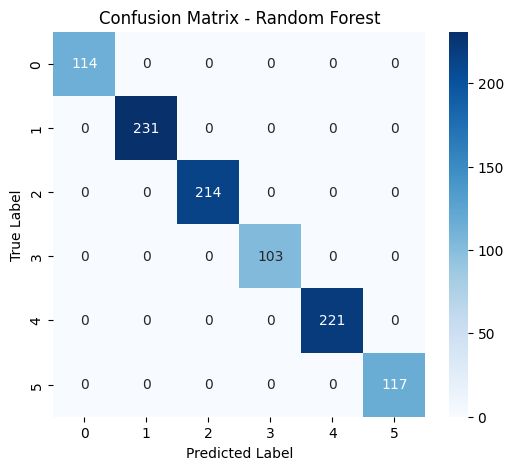

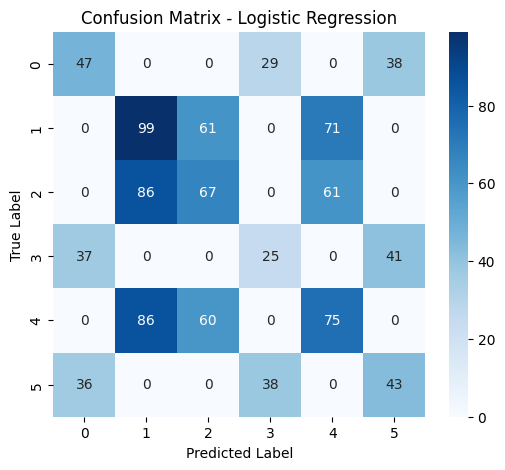

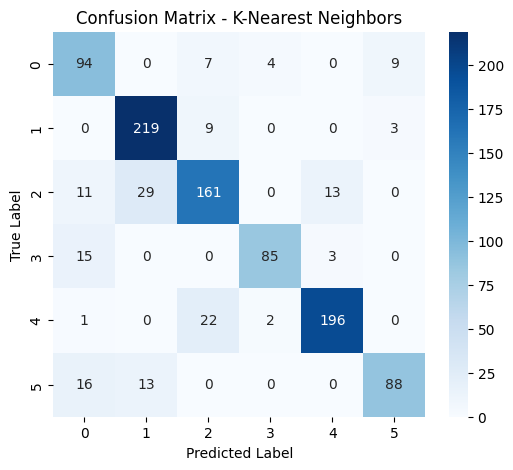

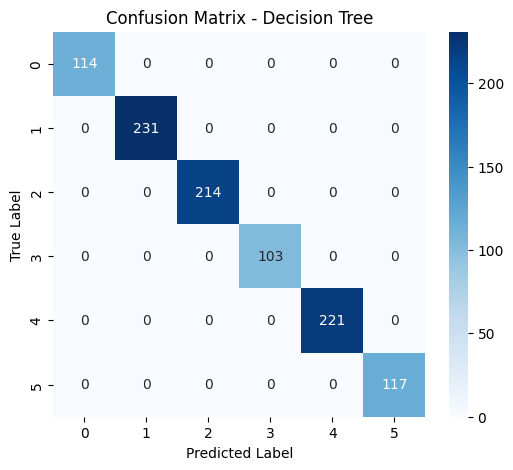

In [9]:
# Visualisasi Confusion Matrix untuk setiap model
for name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


#  Hasil dan Evaluasi Model 

## 1. **Random Forest & Decision Tree**
- **Akurasi:** 1.0000  
- **Precision, Recall, F1-Score:** 1.0000  
- **Evaluasi:**
  - Kedua model menunjukkan performa **sempurna** dalam klasifikasi, dengan seluruh data terklasifikasi secara benar (akurasi 100%).
  - Confusion matrix memperlihatkan tidak ada kesalahan klasifikasi di semua label — semua prediksi berada tepat di diagonal utama.
  - Hal ini bisa terjadi jika data memiliki pola yang sangat jelas, atau model **overfit** terhadap data pelatihan.
  - Disarankan untuk memastikan performa ini juga berlaku di data uji lain atau dilakukan **cross-validation** untuk memastikan generalisasi model.

---

## 2. **Logistic Regression**
- **Akurasi:** 0.3560  
- **Precision, Recall, F1-Score:** Sekitar 0.35  
- **Evaluasi:**
  - Performa model tergolong **lemah**, dengan akurasi yang hanya sedikit lebih baik dari tebak-tebakan acak pada 6 kelas.
  - Confusion matrix menunjukkan banyak misclassifications — nilai-nilai besar berada di luar diagonal utama.
  - Ini menunjukkan model gagal mengenali pola antar fitur, kemungkinan karena hubungan antar variabel **tidak linear**.
  - Logistic Regression lebih cocok untuk data dengan hubungan **linear** dan distribusi **seimbang** antar kelas.
  - Disarankan untuk mencoba teknik seperti **polynomial features** atau beralih ke model non-linear lainnya.

---

## 3. **K-Nearest Neighbors (KNN)**
- **Akurasi:** 0.8430  
- **Precision, Recall, F1-Score:** Sekitar 0.84  
- **Evaluasi:**
  - KNN memberikan hasil **cukup baik**, meskipun masih terdapat beberapa kesalahan klasifikasi.
  - Confusion matrix menunjukkan kesalahan terjadi terutama di kelas 2, 3, dan 5, yang memiliki sebaran prediksi yang lebih luas ke kelas lain.
  - Kinerja KNN sangat dipengaruhi oleh **skala fitur** dan pemilihan parameter `k`.
  - Hasil ini masih bisa ditingkatkan dengan **feature scaling (standardization)** dan **optimasi parameter k** menggunakan cross-validation.
  - Disarankan juga melakukan **dimensionality reduction** (misalnya PCA) jika jumlah fitur tinggi.



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }
}

In [11]:
# Inisialisasi model
base_models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [12]:
# Menyimpan model terbaik setelah tuning
best_models = {}

for name, model in base_models.items():
    print(f" Melakukan tuning untuk {name} ...")
    
    grid_search = GridSearchCV(model, param_grid[name], cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f" {name} selesai tuning. Hyperparameter terbaik: {grid_search.best_params_}")

 Melakukan tuning untuk Random Forest ...
 Random Forest selesai tuning. Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
 Melakukan tuning untuk Logistic Regression ...


E:\Dicoding_Task\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression selesai tuning. Hyperparameter terbaik: {'C': 0.01, 'solver': 'lbfgs'}
 Melakukan tuning untuk K-Nearest Neighbors ...
 K-Nearest Neighbors selesai tuning. Hyperparameter terbaik: {'n_neighbors': 9, 'weights': 'distance'}
 Melakukan tuning untuk Decision Tree ...
 Decision Tree selesai tuning. Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 2}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
# Evaluasi model setelah tuning
results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} dievaluasi dengan akurasi: {accuracy:.4f}")

 Random Forest dievaluasi dengan akurasi: 1.0000
 Logistic Regression dievaluasi dengan akurasi: 0.3620
 K-Nearest Neighbors dievaluasi dengan akurasi: 0.9060
 Decision Tree dievaluasi dengan akurasi: 1.0000


In [14]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Random Forest
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------

 Model: Logistic Regression
  Accuracy: 0.3620
  Precision: 0.3632
  Recall: 0.3620
  F1-Score: 0.3456
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.9060
  Precision: 0.9057
  Recall: 0.9060
  F1-Score: 0.9055
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------


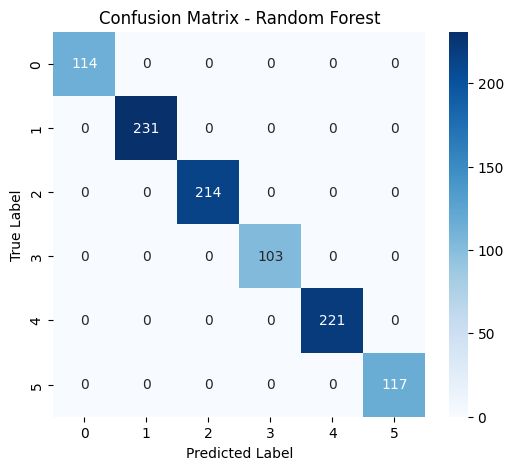

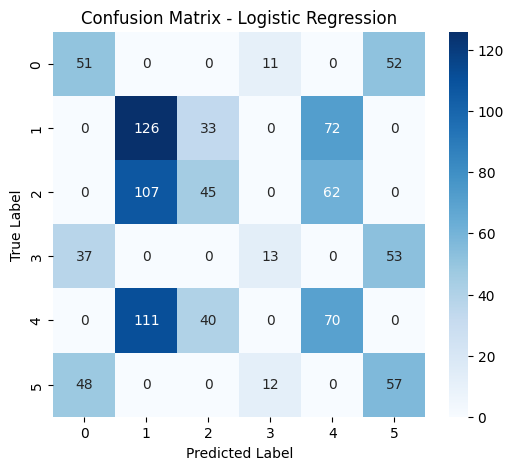

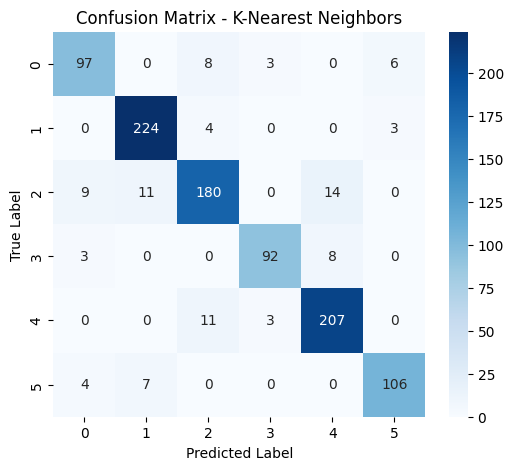

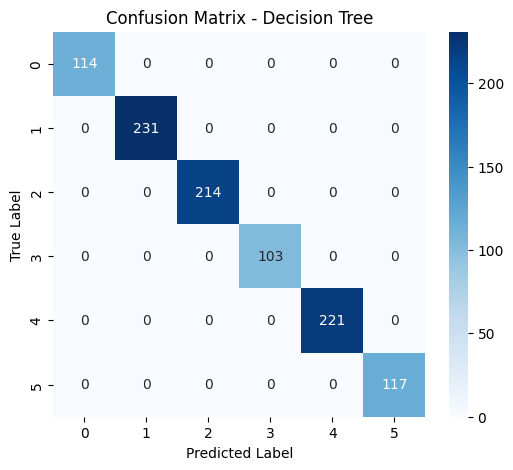

In [15]:
# Menampilkan Confusion Matrix
for name, metrics in results.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**


##  Hasil dan Evaluasi Model (Sebelum & Sesudah Tuning)

Pada bagian ini, dilakukan analisis terhadap hasil evaluasi dari beberapa model klasifikasi sebelum dan sesudah tuning. Model yang diuji antara lain: **Random Forest**, **Logistic Regression**, **K-Nearest Neighbors (KNN)**, dan **Decision Tree**. Evaluasi dilakukan menggunakan metrik seperti **Accuracy**, **Precision**, **Recall**, dan **F1-Score**.

---

### **1. Perbandingan Hasil Sebelum dan Sesudah Tuning**

| Model                | Accuracy (Sebelum) | Accuracy (Sesudah) | F1-Score (Sebelum) | F1-Score (Sesudah) |
|----------------------|-------------------|--------------------|--------------------|--------------------|
| Random Forest        | 1.0000            | 1.0000             | 1.0000             | 1.0000             |
| Logistic Regression  | 0.3560            | 0.3620             | 0.3542             | 0.3456             |
| K-Nearest Neighbors  | 0.8430            | 0.9060             | 0.8431             | 0.9055             |
| Decision Tree        | 1.0000            | 1.0000             | 1.0000             | 1.0000             |

---

### **2. Identifikasi Kelemahan dan Kekuatan Model**

-  **Random Forest & Decision Tree:**
  - Kedua model menunjukkan hasil evaluasi yang **sempurna (100%)**, baik sebelum maupun sesudah tuning.
  - Menandakan kemampuan model menangkap pola dengan sangat baik.
  - Disarankan dilakukan **cross-validation** atau uji pada data nyata yang belum pernah dilihat model sebelumnya.

-  **Logistic Regression:**
  - Memiliki akurasi dan F1-score paling rendah, baik sebelum maupun sesudah tuning, dengan peningkatan yang sangat kecil (sekitar +0.6% akurasi).
  - Hasil ini menunjukkan bahwa model ini **tidak cocok** untuk dataset ini — bisa jadi karena:
    - Pola antar fitur tidak linear.
    - Terdapat banyak kelas dan distribusi tidak seimbang.
  - Tuning tidak memberikan dampak berarti karena keterbatasan linearitas pada model ini.

-  **K-Nearest Neighbors (KNN):**
  - Mengalami peningkatan performa yang cukup signifikan setelah tuning, dari akurasi **0.8430** menjadi **0.9060**.
  - Hal ini menunjukkan tuning seperti pengaturan parameter `n_neighbors`, `weights`, dan **feature scaling** sangat membantu meningkatkan akurasi KNN.
  - Meski belum sempurna seperti Random Forest atau Decision Tree, model ini cukup menjanjikan dan **lebih generalizable**.

---

### **3. Rekomendasi Tindakan Lanjutan**

1. **Uji Overfitting pada Model "Sempurna":**
   - Lakukan **k-fold cross-validation** untuk memastikan Random Forest dan Decision Tree tidak hanya menghafal data.
   - Coba uji model pada data real-world atau data uji terpisah.

2. **Eksplorasi Model Alternatif:**
   - Karena Logistic Regression kurang optimal, pertimbangkan model lain yang bisa menangkap kompleksitas data:
     - **SVM (Support Vector Machine)**
     - **Gradient Boosting (XGBoost, LightGBM)**
     - **Neural Networks** (jika dataset cukup besar)

3. **Visualisasi Confusion Matrix:**
   - Gunakan **confusion matrix** untuk melihat lebih detail kelas mana yang paling sering salah diklasifikasikan, terutama untuk model yang tidak sempurna seperti KNN.

4. **Peningkatan Dataset dan Feature Engineering:**
   - Lakukan **eksplorasi data lebih lanjut**, cek apakah ada fitur yang bisa ditambahkan atau diubah agar model bisa belajar lebih baik.
   - Jika jumlah data terbatas, pertimbangkan teknik **data augmentation** atau **SMOTE** untuk menyeimbangkan kelas.

